<a href="https://colab.research.google.com/github/nqohuuluan/3_faces_recogniton/blob/main/3faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nhan dien khuon mat 3 nguoi, moi nguoi 50 anh**

↪



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import matplotlib.pyplot as plt

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [2]:
# mount with google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [3]:
# set data path
dataset_path = '/content/gdrive/MyDrive/Colab-Notebooks/3FacesImage'


In [4]:

image_size = (150,150)
TRAINING_DATA_DIR = str(dataset_path)
print(TRAINING_DATA_DIR)

# modify data
kwargs_datagen = dict(rescale=1./255, validation_split=0.2) # 20 percent for validation

# validation data modify 
valid_datagen = ImageDataGenerator(**kwargs_datagen)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", shuffle=True, target_size=image_size)

# train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=image_size)


/content/gdrive/MyDrive/Colab-Notebooks/3FacesImage
Found 30 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [5]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

image batch shape:  (32, 150, 150, 3)
label batch shape:  (32, 3)
labels:  ['Kiet' 'Luan' 'Vinh']
match class:  {'Kiet': 0, 'Luan': 1, 'Vinh': 2}


In [ ]:
model=Sequential()

# Create layer model with ANN
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history=model.fit(train_generator,epochs=10,batch_size=4,validation_data=valid_generator,steps_per_epoch=steps_per_epoch,verbose=1)

# Save model
model.save('ANN_FaceDetec.h5')

sai so kiem tra la:  2.9802318390892424e-09
do chinh xac kiem tra la:  1.0


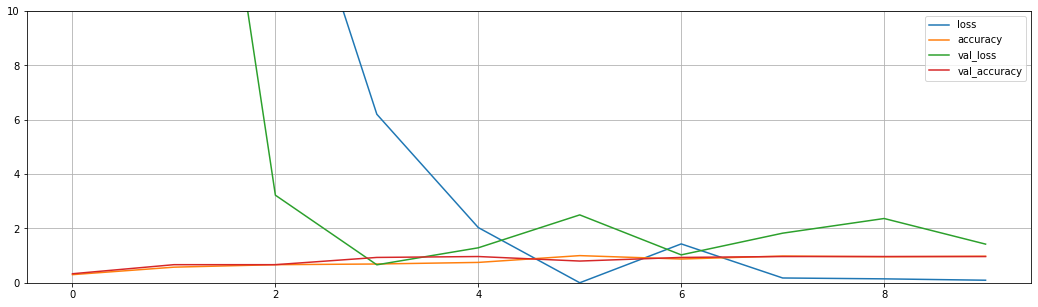

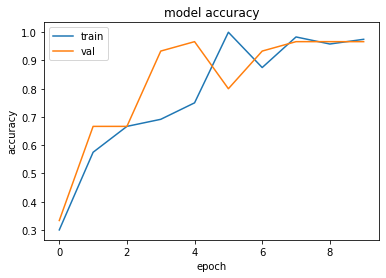

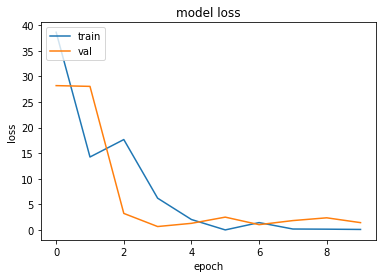

In [ ]:
# danh gia do chinh xac cua ANN
score = model.evaluate(train_generator, verbose = 0)
print('sai so kiem tra la: ', score[0])
print('do chinh xac kiem tra la: ', score[1])

# Diagram
pd.DataFrame(history.history).plot(figsize = (18,5))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [ ]:
from google.colab import files
test_1 = files.upload()

Saving test1.jpg to test1.jpg


Luan


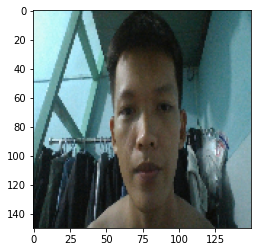

In [ ]:
# Testing code with ANN model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np

# Load and define image - to test
img = load_img('test1.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

# predict 
guess=np.argmax(model.predict(img),axis=1)
if guess[0]==0:
  print("Kiet")
if guess[0]==1:
  print("Luan")
if guess[0]==2:
  print("Vinh")

In [6]:
# Create layer model with CNN

model1=Sequential()
# BLock 1
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) 
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model1.add(MaxPooling2D((2,2)))
#Block 2
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
#Block 3
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(3,activation='softmax'))
model1.summary()


#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model1.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history1=model1.fit(train_generator,epochs=10,batch_size=4,validation_data=valid_generator,steps_per_epoch=steps_per_epoch,verbose=1)

# Save model
model1.save('CNN_FaceDetec.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

sai so kiem tra la:  5.4637443014371456e-08
do chinh xac kiem tra la:  1.0


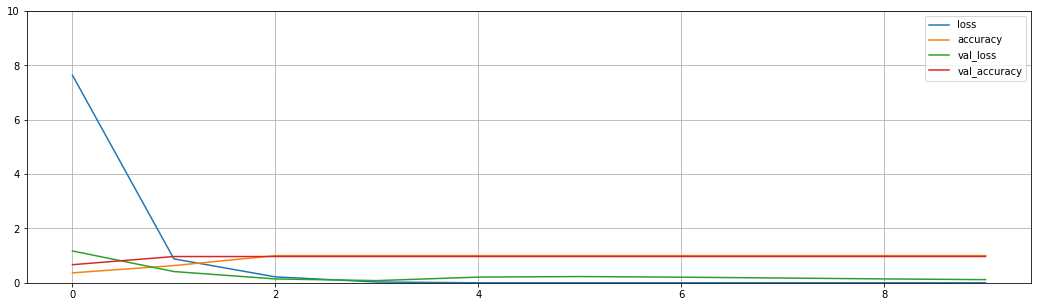

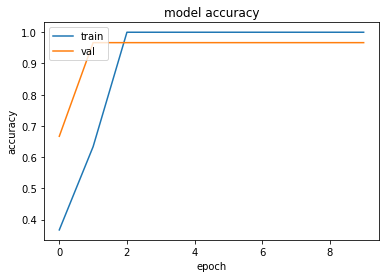

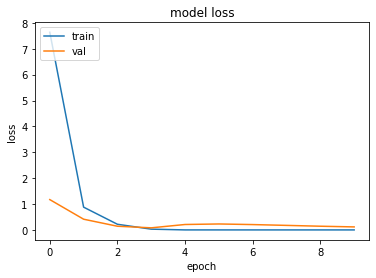

In [11]:
# danh gia do chinh xac cua CNN
score = model1.evaluate(train_generator, verbose = 0)
print('sai so kiem tra la: ', score[0])
print('do chinh xac kiem tra la: ', score[1])

# Diagram
pd.DataFrame(history1.history).plot(figsize = (18,5))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show()

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [13]:
# upload test img
from google.colab import files
test_1 = files.upload()

This is Luan


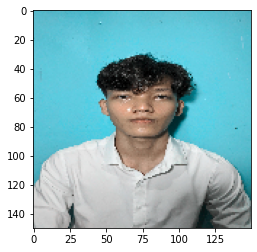

In [14]:
# Testing code with CNN model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np


# Load and define image - to test
img = load_img('test_luan.jpg', target_size=(150,150))
plt.imshow(img)
img=image.img_to_array(img) 
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

# predict 
guess=np.argmax(model1.predict(img),axis=1)
if guess[0]==0:
  print("This is Kiet")
if guess[0]==1:
  print("This is Luan")
if guess[0]==2:
  print("This is Vinh")